In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
e = (0.1)

In [4]:
def norm_p():
    x = np.random.uniform(1,2.5)
    return 1 - norm.cdf(abs(x))

In [5]:
def generate_dataset(pi1 = 0.1, n = 10000, f1 = norm_p, f0 = np.random.uniform):
    x = []
    y = np.random.rand(n) > 1-pi1
    for i in range(len(y)):
        if y[i]:
            x.append(f1())
        else:
            x.append(f0())
    return x,y

In [6]:
import pickle as pkl

In [12]:
x_1,y_1 = generate_dataset(pi1 = 0.3)
x_2, y_2 = generate_dataset(pi1 = 0.7)

In [21]:
with open('two_group.csv', 'w') as f:
    f.write('pvalue, H, G\n')
    for item in zip(x_1, y_1):
        f.write(','.join([str(item[0]), str(int(item[1])), '0']))
        f.write('\n')
    for item in zip(x_2, y_2):
        f.write(','.join([str(item[0]), str(int(item[1])), '1']))
        f.write('\n')
    f.close()

In [10]:
def BH(x, alpha = 0.05):
    x_s = sorted(x)
    n = len(x_s)
    ic = 0
    for i in range(n):
        if x_s[i] < i*alpha/float(n):
            ic = i
    return ic, x_s[ic]

In [11]:
BH(x, alpha = 0.05 /(1-pi0))

NameError: name 'pi0' is not defined

In [51]:
BH(x_bh)

(1021, 0.0011331385263764204)

In [52]:
from sklearn.neighbors import KernelDensity

(array([ 2338.,   931.,   758.,   701.,   642.,   606.,   585.,   580.,
          547.,   562.,   565.,   545.,   523.,   495.,   543.,   474.,
          497.,   438.,   465.,   471.,   475.,   500.,   480.,   444.,
          479.,   414.,   405.,   416.,   439.,   473.,   428.,   429.,
          417.,   449.,   399.,   401.,   444.,   413.,   420.,   401.,
          431.,   441.,   439.,   386.,   407.,   393.,   393.,   364.,
          410.,   416.,   399.,   358.,   389.,   397.,   424.,   405.,
          398.,   371.,   356.,   361.,   361.,   368.,   406.,   353.,
          379.,   387.,   360.,   354.,   397.,   355.,   364.,   386.,
          353.,   374.,   385.,   356.,   358.,   340.,   343.,   361.,
          370.,   367.,   370.,   328.,   370.,   356.,   322.,   385.,
          390.,   374.,   354.,   348.,   368.,   368.,   385.,   365.,
          381.,   368.,   354.,   373.]),
 array([  3.14213056e-09,   9.99984451e-03,   1.99996859e-02,
          2.99995272e-02,   3.99

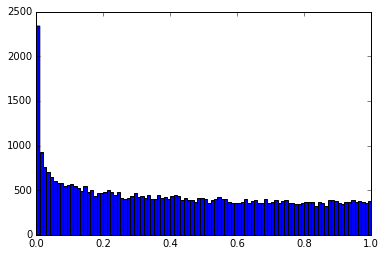

In [68]:
plt.hist(x_bh, 100)

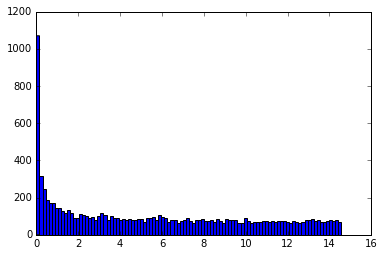

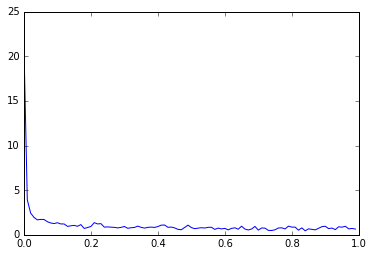

In [69]:
X = x_bh[0:10000]


X = X[:, np.newaxis]
x_test = np.arange(0,1,0.01)
plt.hist(x[0:10000],100)
kde = KernelDensity(kernel='gaussian', bandwidth=0.001).fit(X)
log_pdf = kde.score_samples(x_test[:, np.newaxis])
pdf = np.exp(log_pdf)
plt.figure()
plt.plot(x_test, pdf)

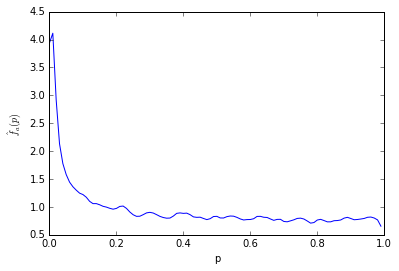

In [63]:
x_1_kde = np.array(x_1)[:,np.newaxis]
kde_x1 = KernelDensity(kernel='gaussian', bandwidth=0.01).fit(x_1_kde)
x_test = np.arange(0,1,0.01)
log_pdf = kde_x1.score_samples(x_test[:, np.newaxis])
pdf = np.exp(log_pdf)
plt.figure()
plt.plot(x_test, pdf)
plt.xlabel('p')
plt.ylabel('$\hat{f}_a(p)$')
plt.savefig('fa.pdf')


In [55]:
fa1 = np.exp(kde_x1.score_samples([0.9]))[0]

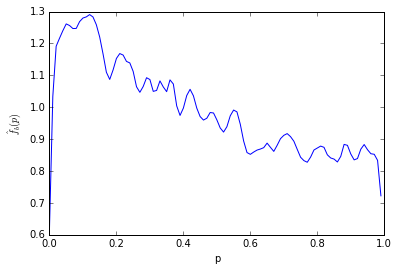

In [62]:
x_2_kde = np.array(x_2)[:,np.newaxis]
kde_x2 = KernelDensity(kernel='gaussian', bandwidth=0.01).fit(x_2_kde)
x_test = np.arange(0,1,0.01)
log_pdf = kde_x2.score_samples(x_test[:, np.newaxis])
pdf = np.exp(log_pdf)
plt.figure()
plt.plot(x_test, pdf)

plt.xlabel('p')
plt.ylabel('$\hat{f}_b(p)$')
plt.savefig('fb.pdf')


In [64]:
fb1 = np.exp(kde_x2.score_samples([0.9]))[0]

In [65]:
fa1, fb1

(0.83440262564598189, 0.85348731738741612)

In [66]:
for ta in np.arange(0.05,0.12,0.0005):
    left = np.exp(kde_x1.score_samples([ta]))[0] / (fa1)
    for tb in np.arange(0.0,0.03, 0.0005):
        right = np.exp(kde_x2.score_samples([tb]))[0] / (fb1)
        if right < left:
            break
            
    disco = np.sum(np.array(x_1) < ta) + np.sum(np.array(x_2) < tb)
    
    fp = 100000 * fa1 * ta +  100000 * fb1 * tb 
    
    print left, right, ta, tb, disco, fp/float(disco)
    

1.89252996453 0.722709310976 0.05 0.0 3995 1.04430866789
1.88301833203 0.722709310976 0.0505 0.0 4010 1.05080629913
1.87366623871 0.722709310976 0.051 0.0 4028 1.0564680712
1.86446997594 0.722709310976 0.0515 0.0 4048 1.06155472383
1.85542649521 0.722709310976 0.052 0.0 4069 1.06632923405
1.84653338847 0.722709310976 0.0525 0.0 4089 1.07131665068
1.83778886508 0.722709310976 0.053 0.0 4106 1.07704186944
1.82919172483 0.722709310976 0.0535 0.0 4119 1.08377131518
1.82074132634 0.722709310976 0.054 0.0 4132 1.09045841687
1.81243755046 0.722709310976 0.0545 0.0 4151 1.0955177812
1.80428075815 0.722709310976 0.055 0.0 4173 1.09973986126
1.79627174288 0.722709310976 0.0555 0.0 4185 1.10655545337
1.78841167722 0.722709310976 0.056 0.0 4199 1.112801787
1.780702054 0.722709310976 0.0565 0.0 4218 1.11768014104
1.77314462206 0.722709310976 0.057 0.0 4235 1.12304485624
1.76574131718 0.722709310976 0.0575 0.0 4251 1.1286321095
1.75849418872 0.722709310976 0.058 0.0 4260 1.13604113351
1.75140532266 

In [60]:
fp = 0.04028600184781931*7/3 * 100000 * 0.3 + 0.04028600184781931*3/7 * 100000 * 0.7

In [61]:
fp

4028.6001847819307

In [177]:
4028/80577.0

0.05000186157340184

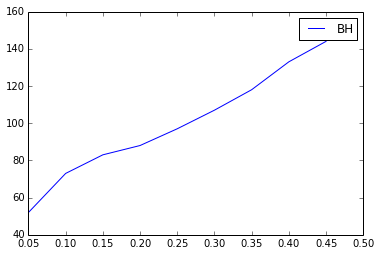

In [9]:
ths = np.arange(0.05,0.5,0.05)
BHs = [BH(x,alpha=th) for th in ths]
plt.plot(ths, BHs)
plt.legend(['BH'])

In [10]:
def generate_weights(y, mu1, mu0):
    w = (y == 1) * mu1 + (y==0) * mu0
    w = w/np.mean(w)
    return w

In [11]:
w = generate_weights(y, 2, 1.5)

In [12]:
def wBH(x, w, alpha = 0.05):
    x = x/w
    x_s = sorted(x)
    n = len(x_s)
    ic = 0
    for i in range(n):
        if x_s[i] < i*alpha/float(n):
            ic = i
    return ic

In [13]:
def awBH(x, w, alpha = 0.05):
    s = np.random.choice(range(len(x)),  100, replace = False)
    sample_x = np.array(x)[np.array(s)]
    sample_w = np.array(w)[np.array(s)]
    
    mu1, mu0, c = BH_getw(sample_x, sample_w, alpha = 0.05)
    
    rest = set(range(len(x))) - set(s)
    rest = list(rest)
    rest_x = np.array(x)[np.array(rest)]
    rest_w = np.array(w)[np.array(rest)]
    
    if mu1 > mu0:
        return wBH(rest_x, rest_w, alpha = alpha) 
    else:
        return BH(rest_x,  alpha = alpha) 

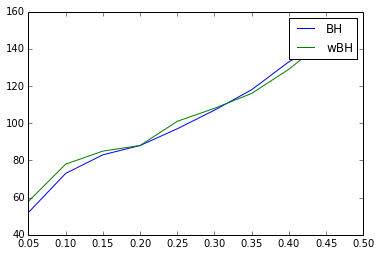

In [14]:
ths = np.arange(0.05,0.5,0.05)
BHs = [BH(x,alpha=th) for th in ths]
wBHs = [wBH(x,w,alpha=th) for th in ths]
plt.plot(ths, BHs)
plt.plot(ths, wBHs)
plt.legend(['BH', 'wBH'])

In [15]:
def BH_getw(x, w, alpha = 0.05):
    res = np.array(sorted(list(np.array([x,w]).T), key = lambda x:x[0]))
    x_s = res[:,0]
    w_s = res[:,1]
    n = len(x_s)
    ic = 0
    for i in range(n):
        if x_s[i] < i*alpha/float(n):
            ic = i
    return np.mean(w_s[:ic]), np.mean(w_s[ic:]), ic

In [16]:
BH_getw(x,w)

(1.2841091492776884, 0.98441595383708835, 52)

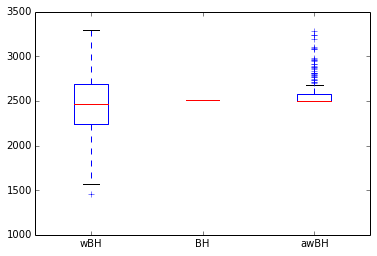

In [67]:
x,y = generate_dataset(n=50000)
BHs = []
wBHs = []
awBHs = []


for i in range(200): #simulate 100 times
    mu1 = np.random.uniform(0.1,2)
    mu0 = np.random.uniform(0.1,2)
    #print mu1, mu0
    w = generate_weights(y, mu1, mu0)
    
    wBHs.append(wBH(x, w, alpha = 0.05))
    BHs.append(BH(x, alpha = 0.05))
    awBHs.append(awBH(x, w, alpha = 0.05))
    
plt.boxplot([wBHs, BHs, awBHs])
plt.xticks([1,2,3],['wBH', 'BH', 'awBH'])
plt.savefig('compare2.pdf')

In [68]:
x,y = generate_dataset(n=10000)

ths = np.arange(0.05,0.5,0.05)
performance = np.zeros((9,len(ths)))

for j in range(len(ths)):
    th = ths[j]
    BHs = []
    wBHs = []
    awBHs = []

    for i in range(100): #simulate 100 times
        mu1 = np.random.uniform(0.1,3)
        mu0 = np.random.uniform(0.1,3)
        #print mu1, mu0
        w = generate_weights(y, mu1, mu0)
        wBHs.append(wBH(x, w, alpha = th))
        BHs.append(BH(x, alpha = th))
        awBHs.append(awBH(x, w, alpha = th))
    performance[0,j] = np.max(wBHs)
    performance[1,j] = np.max(BHs)
    performance[2,j] = np.max(awBHs)
    performance[3,j] = np.min(wBHs)
    performance[4,j] = np.min(BHs)
    performance[5,j] = np.min(awBHs)
    performance[6,j] = np.mean(wBHs)
    performance[7,j] = np.mean(BHs)
    performance[8,j] = np.mean(awBHs)
    
    

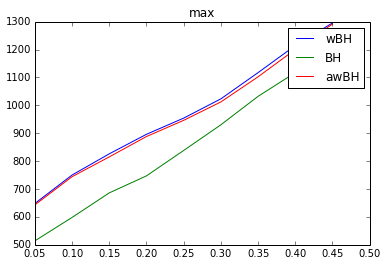

In [69]:
plt.plot(ths,performance[0:3, :].T)
plt.legend(['wBH', 'BH', 'awBH'])
plt.title('max')
plt.savefig('max_vara.pdf')

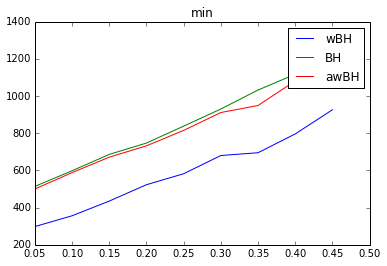

In [70]:
plt.plot(ths,performance[3:6, :].T)
plt.legend(['wBH', 'BH', 'awBH'])
plt.title('min')
plt.savefig('min_vara.pdf')

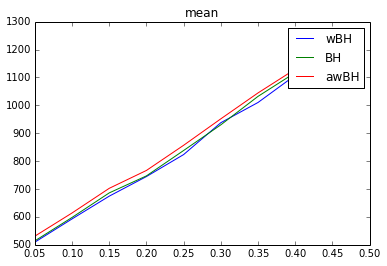

In [71]:
plt.plot(ths,performance[6:9, :].T)
plt.legend(['wBH', 'BH', 'awBH'])
plt.title('mean')
plt.savefig('mean_vara.pdf')

In [44]:
ns = np.arange(1000,40000,1000)
performance = np.zeros((9,len(ns)))

for j in range(len(ns)):
    n = ns[j]
    x,y = generate_dataset(n=n)
    th = 0.05
    BHs = []
    wBHs = []
    awBHs = []
    t = np.sum(y)

    for i in range(100): #simulate 100 times
        mu1 = np.random.uniform(0.1,3)
        mu0 = np.random.uniform(0.1,3)
        #print mu1, mu0
        w = generate_weights(y, mu1, mu0)
        wBHs.append(wBH(x, w, alpha = th)/float(t))
        BHs.append(BH(x, alpha = th)/float(t))
        awBHs.append(awBH(x, w, alpha = th)/float(t))
    performance[0,j] = np.max(wBHs)
    performance[1,j] = np.max(BHs)
    performance[2,j] = np.max(awBHs)
    performance[3,j] = np.min(wBHs)
    performance[4,j] = np.min(BHs)
    performance[5,j] = np.min(awBHs)
    performance[6,j] = np.mean(wBHs)
    performance[7,j] = np.mean(BHs)
    performance[8,j] = np.mean(awBHs)

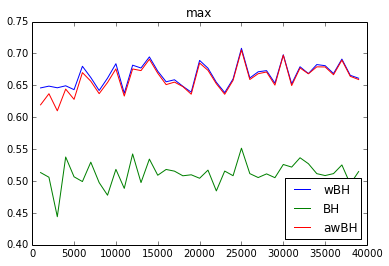

In [60]:
plt.plot(ns,performance[0:3, :].T)
plt.legend(['wBH', 'BH', 'awBH'], loc=4)
plt.title('max')
plt.savefig('max_varn.pdf')

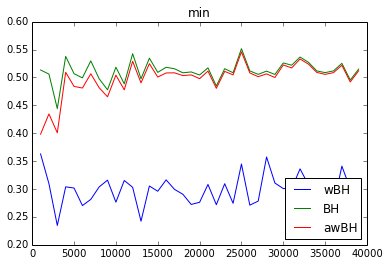

In [59]:
plt.plot(ns,performance[3:6, :].T)
plt.legend(['wBH', 'BH', 'awBH'], loc=4)
plt.title('min')
plt.savefig('min_varn.pdf')

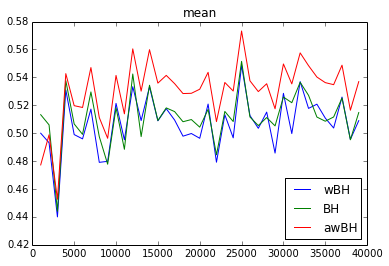

In [58]:
plt.plot(ns,performance[6:9, :].T)
plt.legend(['wBH', 'BH', 'awBH'],loc=4)
plt.title('mean')
plt.savefig('mean_varn.pdf')